In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import datetime
import torch
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [121]:
csv_file = './SPX_Options.csv'
data = pd.read_csv(csv_file)
# data.columns
print(data.shape)
data.dropna(inplace=True)
print(data.shape)
print(data.head())

X = data[['Moneyness', 'TTM', 'D_BS']]
y = data[['Delta Residual']].rename(columns={'Delta Residual': 'Residual'})
# print("NaN in y?", y.isna().sum())

print(f'\n\nFeatures:\n {X.describe()} \n\n\n Test data:\n {y.describe()}')

(1020, 14)
(1008, 14)
         Date  ID  Days until next hedge        S  Dividend        C_BS  \
0  2024/08/05   1                      1  5186.33    1.4816  125.615076   
1  2024/08/06   1                      1  5240.03    1.4665  120.416043   
2  2024/08/07   1                      1  5199.50    1.4786  106.223538   
3  2024/08/08   1                      1  5319.31    1.4450  139.557618   
4  2024/08/09   1                      3  5344.16    1.4383  134.699810   

       D_BS   C_mkt  D_Blm        R  TTM  Moneyness  D_Optimal  Delta Residual  
0  0.308576  147.20  0.339  4.95853  228       -514  -0.398225       -0.706801  
1  0.317215  125.90  0.330  4.95203  227       -460   0.344879        0.027664  
2  0.291429  111.85  0.312  4.85962  226       -501   0.350350        0.058922  
3  0.357376  153.75  0.380  4.95040  225       -381  -0.332813       -0.690190  
4  0.362407  145.55  0.379  4.97276  224       -356   2.613517        2.251110  


Features:
          Moneyness          

         Moneyness          TTM         D_BS
count  1008.000000  1008.000000  1008.000000
mean   -235.488095   124.095238     0.376424
std     262.108849    57.098591     0.203848
min   -1014.000000    18.000000     0.029593
25%    -403.250000    78.750000     0.208732
50%    -218.500000   124.500000     0.364226
75%     -52.750000   169.250000     0.524479
max     347.000000   228.000000     0.948629

Skew: 
Moneyness   -0.235080
TTM          0.003353
D_BS         0.337676
dtype: float64

Kurtosis: 
Moneyness   -0.236822
TTM         -0.964705
D_BS        -0.646047
dtype: float64


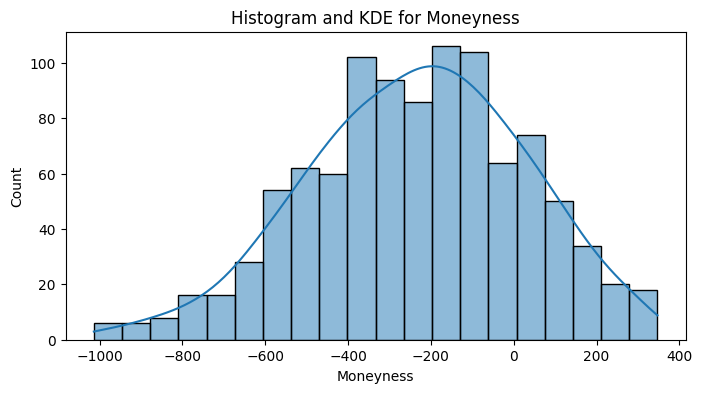

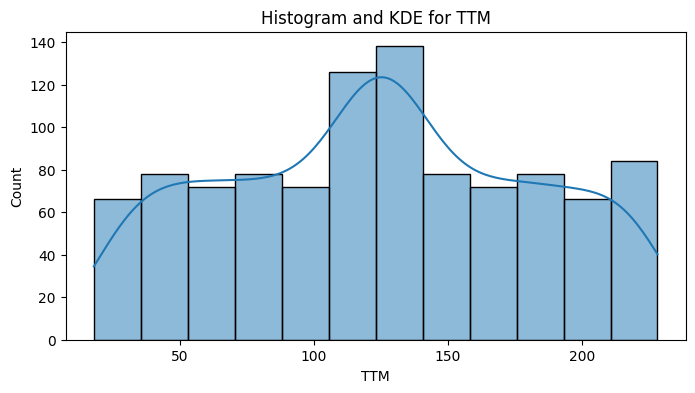

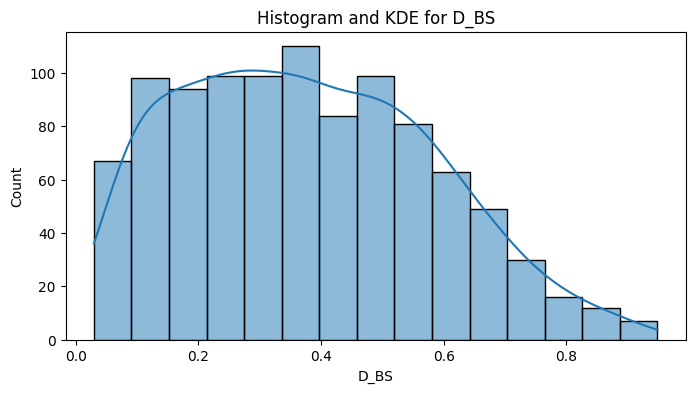

          Residual
count  1008.000000
mean     -0.254678
std       3.233856
min     -40.533411
25%      -0.123975
50%      -0.033288
75%       0.067694
max       8.216118

Skew: 
Residual   -8.577093
dtype: float64

Kurtosis: 
Residual    84.230278
dtype: float64


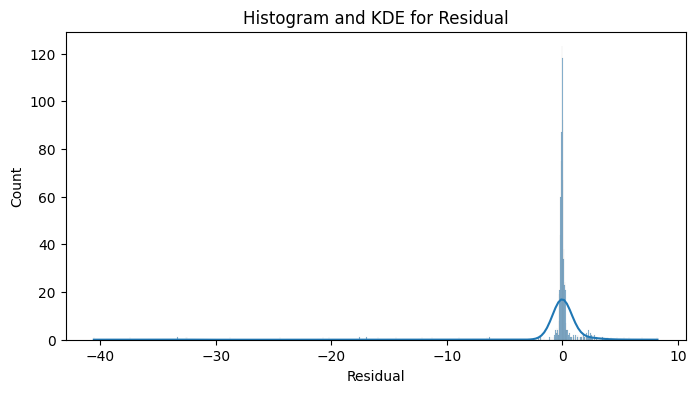

In [122]:
def describe_data(df):
    print(df.describe())
    print("\nSkew: ")
    print(df.skew())
    print("\nKurtosis: ")
    print(df.kurtosis())
    for column in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram and KDE for {column}')
        plt.show()

describe_data(X)
describe_data(y)

In [123]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(type(y_train_val))
# print(y_train_val.isna().sum())


<class 'pandas.core.frame.DataFrame'>


In [124]:
# Going with minmax for now, which may be a problem specifically with target Residual we can discuss further

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
# print(y_train.isna().sum())

In [125]:
def plot_train_test(train, test):
    columns = train.columns.tolist()
    # print(train.min(), test.min(), train.max(), test.max())
    for column in columns:
        plt.hist(train[column], bins=30, alpha=0.5
                 , label=f'Training data for {column}')
        plt.hist(test[column], bins=30, alpha=0.5, label=f'Test data for {column}')
        plt.legend()
        plt.title(f'Distribution of {column}')
        plt.show()

# print(X_train.min())


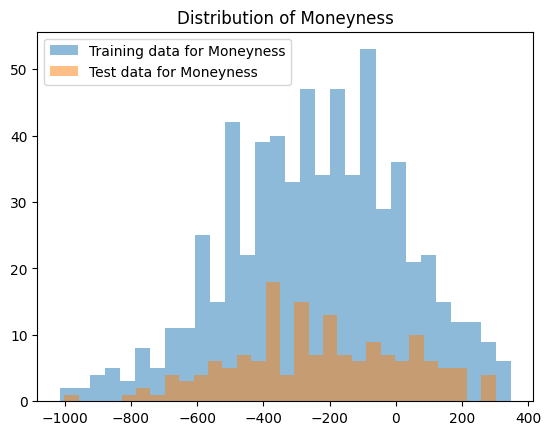

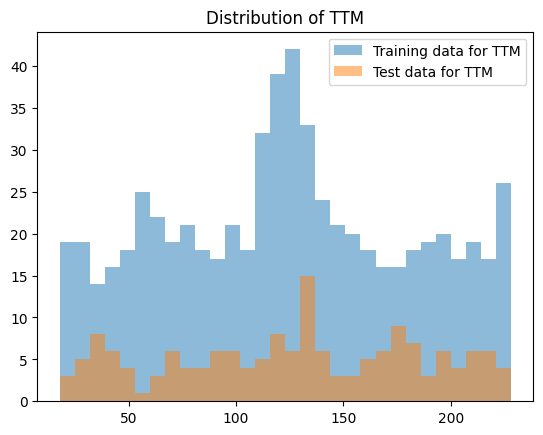

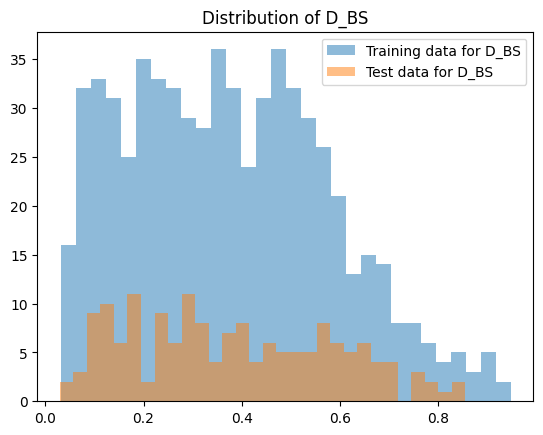

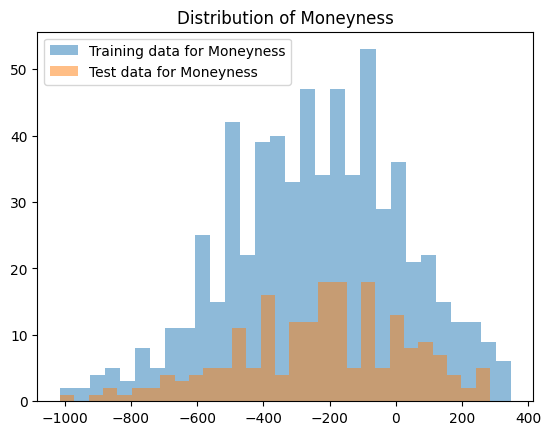

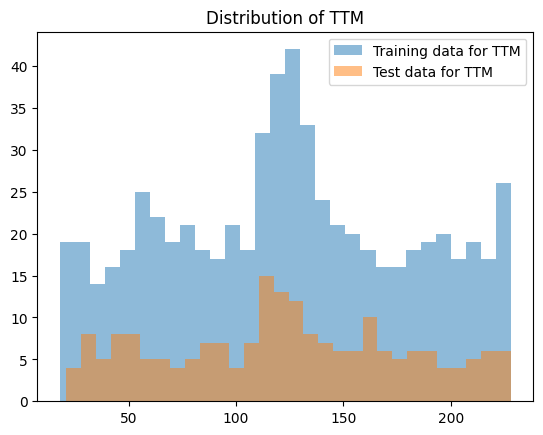

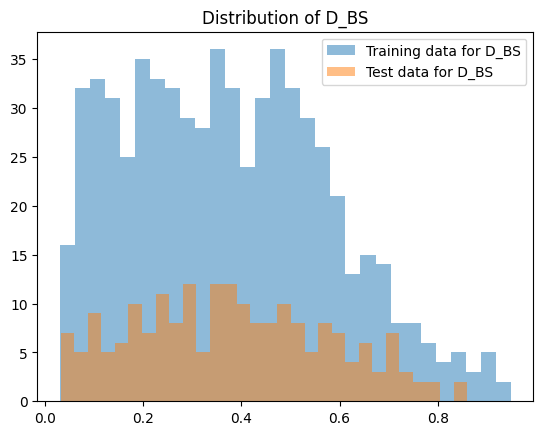

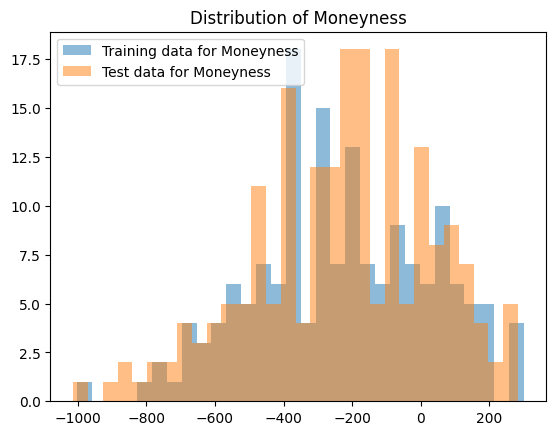

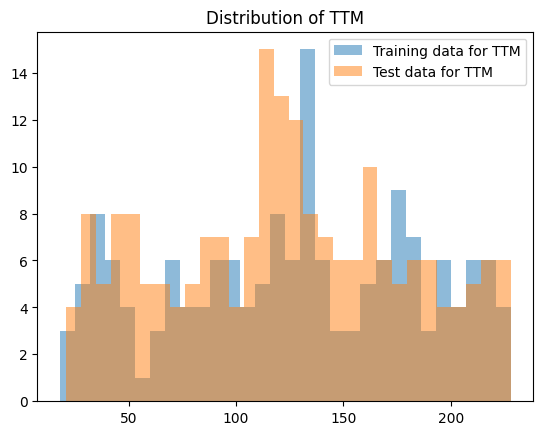

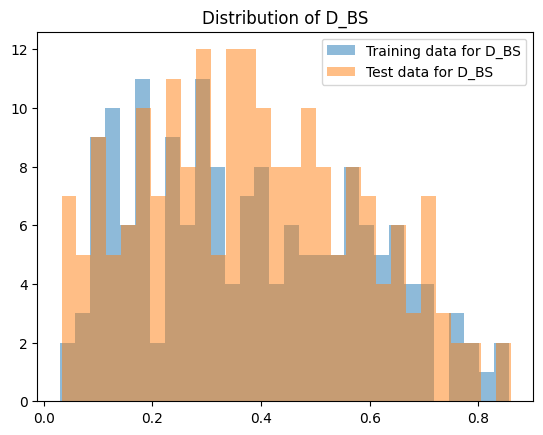

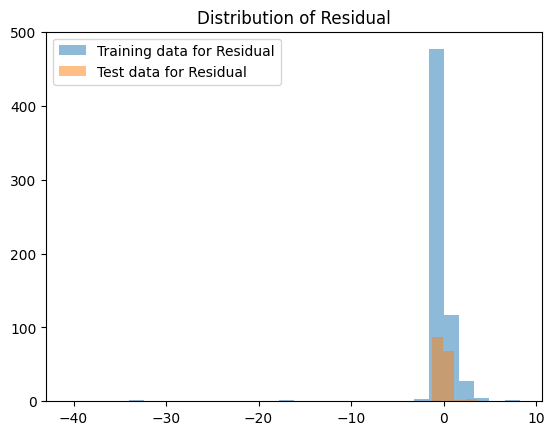

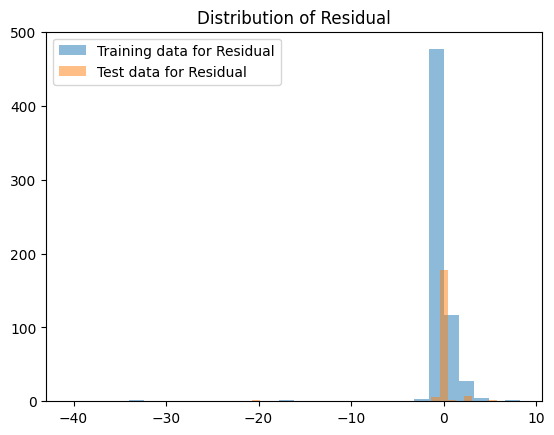

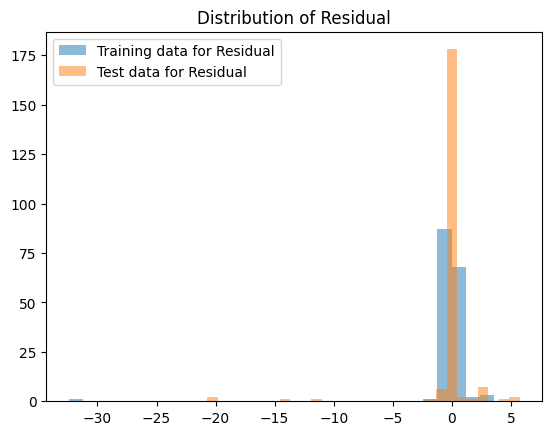

In [126]:
plot_train_test(X_train, X_val)
print("\n\n\n\n\n\n")
plot_train_test(X_train, X_test)
print("\n\n\n\n\n\n")
plot_train_test(X_val, X_test)
print("\n\n\n\n\n\n")

plot_train_test(y_train, y_val)
print("\n\n\n\n\n\n")
plot_train_test(y_train, y_test)
print("\n\n\n\n\n\n")
plot_train_test(y_val, y_test)  # Make note this is comparing the val to test

In [127]:
scaler = MinMaxScaler()

datasets = {
    "X_train": X_train,
    "X_val": X_val,
    "X_test": X_test,
    "y_train": y_train,
    "y_val": y_val,
    "y_test": y_test
}

for key in datasets:
    datasets[key] = scaler.fit_transform(datasets[key])

feat_cols = ['Moneyness', 'TTM', 'D_BS']
target_cols = ['Residual']

X_train = pd.DataFrame(datasets["X_train"], columns=feat_cols)
X_test = pd.DataFrame(datasets["X_test"], columns=feat_cols)
X_val = pd.DataFrame(datasets["X_val"], columns=feat_cols)
y_train = pd.DataFrame(datasets["y_train"], columns=target_cols)
y_test = pd.DataFrame(datasets["y_test"], columns=target_cols)
y_val = pd.DataFrame(datasets["y_val"], columns=target_cols)

# def scale_datasets(scaler, *datasets):
#     return [scaler.fit_transform(dataset) if i == 0 else scaler.transform(dataset) 
#             for i, dataset in enumerate(datasets)]

# # Scale datasets
# X_train, X_val, X_test = scale_datasets(scaler, X_train, X_val, X_test)
# y_train, y_val, y_test = scale_datasets(scaler, y_train, y_val, y_test)

# # Check the result

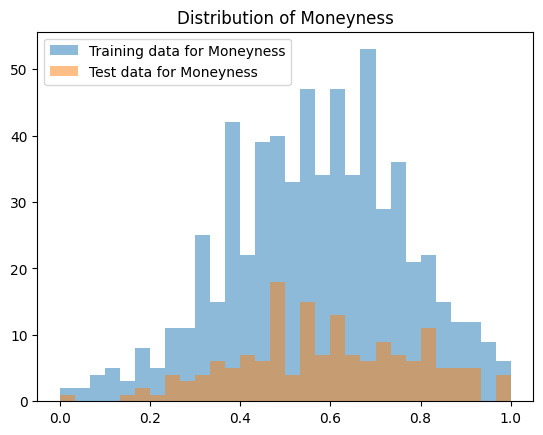

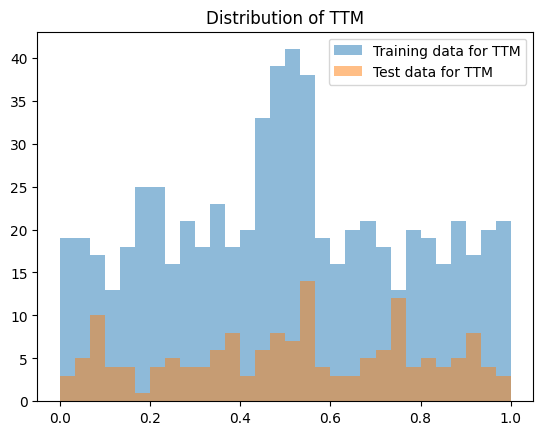

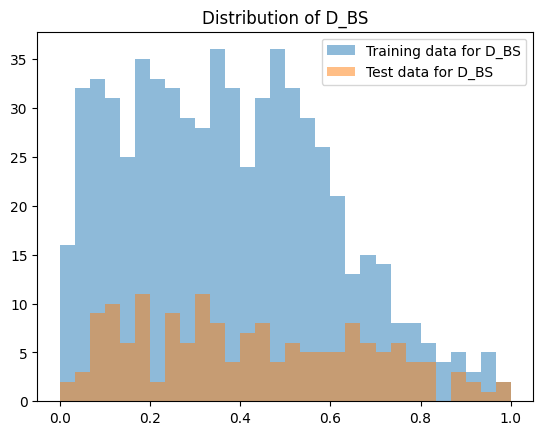

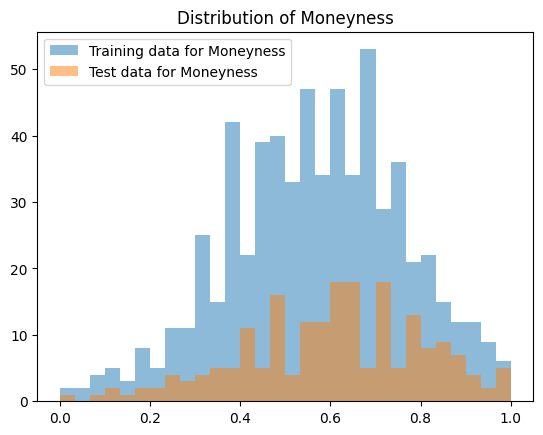

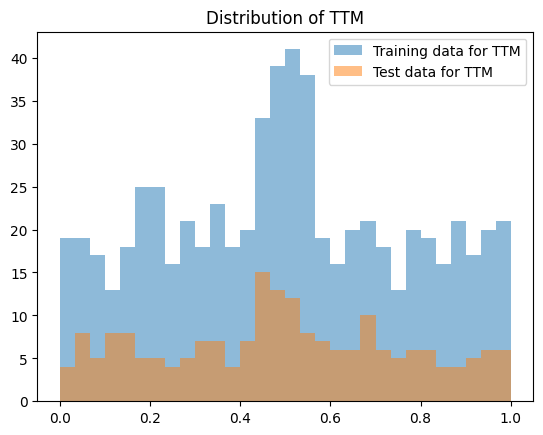

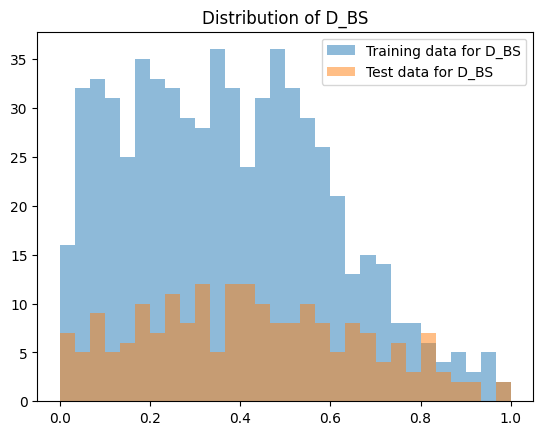

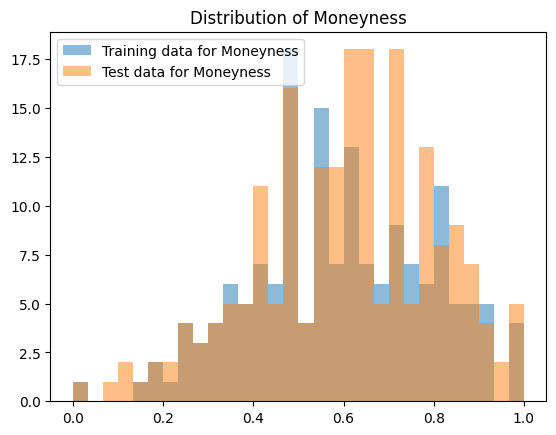

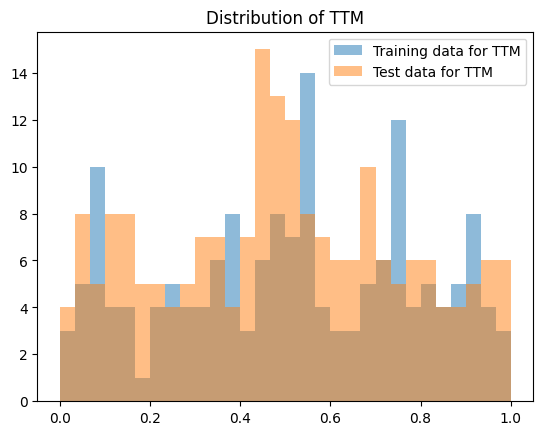

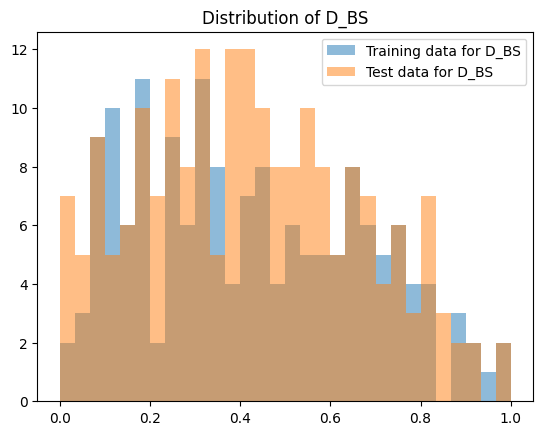

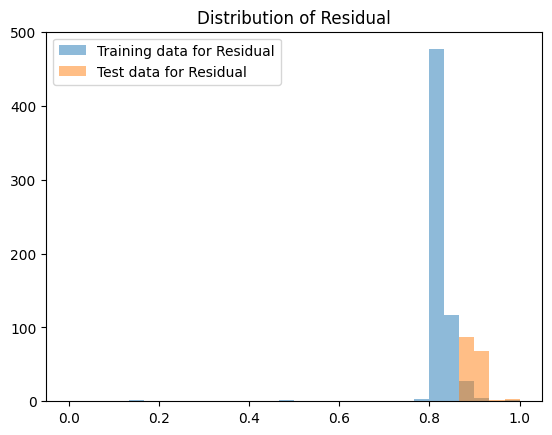

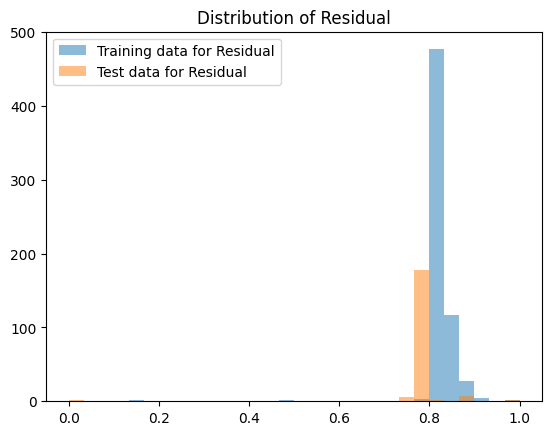

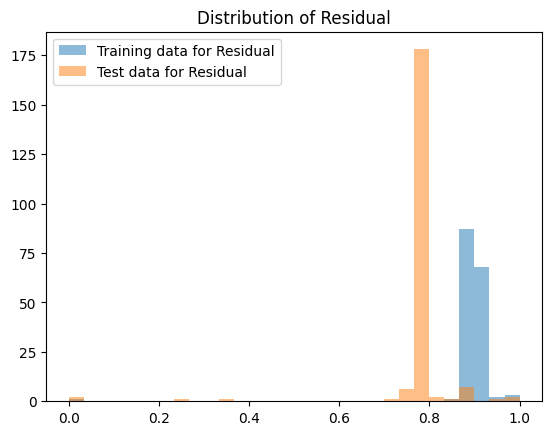

In [128]:
plot_train_test(X_train, X_val)
print("\n\n\n\n\n\n")
plot_train_test(X_train, X_test)
print("\n\n\n\n\n\n")
plot_train_test(X_val, X_test)
print("\n\n\n\n\n\n")

plot_train_test(y_train, y_val)
print("\n\n\n\n\n\n")
plot_train_test(y_train, y_test)
print("\n\n\n\n\n\n")
plot_train_test(y_val, y_test)  # Make note this is comparing the val to test

In [129]:
import torch.nn as nn
import torch.optim as optim


class FNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FNN, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.hidden(x)
        x = self.activation(x)
        x = self.output(x)
        return x


input_size = 3
hidden_size = 6
output_size = 1

In [130]:
model = FNN(input_size, hidden_size, output_size)
loss_func = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

X_train = torch.tensor(X_train.values, dtype=torch.float)
X_test = torch.tensor(X_test.values, dtype=torch.float)
X_val = torch.tensor(X_val.values, dtype=torch.float)

y_train = torch.tensor(y_train.values, dtype=torch.float)
y_test = torch.tensor(y_test.values, dtype=torch.float)
y_val = torch.tensor(y_val.values, dtype=torch.float)

In [131]:
patience = 5
best_val_loss = float('inf')
epochs = 100

for epoch in range(epochs):
    model.train()
    predictions_train = model(X_train)
    loss_train = loss_func(predictions_train, y_train)

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient computation to avoid unintentional updates
        predictions_val = model(X_val)
        loss_val = loss_func(predictions_val, y_val)

    # Check for improvement
    if loss_val < best_val_loss:
        best_val_loss = loss_val
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print("Early stoppage")
            print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {loss_train.item():.4f}, Validation Loss: {loss_val.item():.4f}")
            break
            
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {loss_train.item():.4f}, Validation Loss: {loss_val.item():.4f}")


Epoch [5/100], Training Loss: 0.8909, Validation Loss: 0.9586
Epoch [10/100], Training Loss: 0.6341, Validation Loss: 0.6979
Epoch [15/100], Training Loss: 0.4485, Validation Loss: 0.5056
Epoch [20/100], Training Loss: 0.3061, Validation Loss: 0.3532
Epoch [25/100], Training Loss: 0.1932, Validation Loss: 0.2287
Epoch [30/100], Training Loss: 0.1068, Validation Loss: 0.1309
Epoch [35/100], Training Loss: 0.0494, Validation Loss: 0.0643
Epoch [40/100], Training Loss: 0.0223, Validation Loss: 0.0299
Epoch [45/100], Training Loss: 0.0183, Validation Loss: 0.0200
Epoch [50/100], Training Loss: 0.0225, Validation Loss: 0.0198
Early stoppage
Epoch [52/100], Training Loss: 0.0235, Validation Loss: 0.0198


In [132]:
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = loss_func(predictions, y_test)
    
    print(f"Test Loss: {test_loss.item():.4f}")

Test Loss: 0.0413
